Step 1:
# Download the Dataset
kindly download:
Download the Dataset
Download the dataset to your local computer in the project directory of your choice.

results.csv includes the following columns:
* date - date of the match
* home_team - the name of the home team
* away_team - the name of the away team
* home_score - full-time home team score including extra time, not including penalty-shootouts
* away_score - full-time away team score including extra time, not including penalty-shootouts
* tournament - the name of the tournament
* city - the name of the city/town/administrative unit where the match was played
* country - the name of the country where the match was played
* neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

Note on team and country names:
For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.
For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

Step 2:
# Reading the Dataset
Read the dataset into the Pandas DataFrame!
Does the dataset include any missing values? If so, delete the missing values’ entries!
Hint: Pandas can do that with one line of code!

In [7]:
import pandas as pd
df=pd.read_csv('results.csv').dropna()

Step 3
# Exploring the Dataset
Answer the following questions about the dataset using Python commands:
Q: How many tuples are there in the dataset? A: 42650
Q: How many tournaments are there in the dataset? A: 120
Hint: each question should require few lines of code!

In [11]:
df_tuples = len(df)
print(df_tuples)

42650


In [14]:
tournament_unique = len(df.tournament.unique())
print(tournament_unique)

120


Step 4:
# Convert and Deduce
Convert the column date to timestamps!
Find out how many matches in the dataset were played in 2018.
Hint: use the date column.

In [25]:
df['date'] = pd.to_datetime(df['date'])
df_year = df.date[df['date'].dt.year == 2018].count()
print(df_year)

908


Step 5:
# Team Statistics
Calculate how many times the home team won, lost, or had a draw.

In [27]:
home_wins = df[df['home_score'] > df['away_score']].shape[0]
home_losses = df[df['home_score'] < df['away_score']].shape[0]
home_draws = df[df['home_score'] == df['away_score']].shape[0]

print("Wins", home_wins)
print("Losses", home_losses)
print("Draws", home_draws)

won 20739
lost 12074
draw 9837


Step 6:
# Visualization
Plot the numbers extracted from Step 5 in a pie chart.

([<matplotlib.patches.Wedge at 0x1edf14e11b0>,
 [Text(0.04746637221253046, 1.0989754062348174, 'Wins'),
  Text(-0.7639751740114014, -0.7914176732258695, 'Losses'),
  Text(0.8236470240463938, -0.7291128717691929, 'Draws')],
 [Text(0.025890748479562065, 0.5994411306735367, '48.6%'),
  Text(-0.4167137312789461, -0.43168236721411063, '28.3%'),
  Text(0.4492620131162147, -0.39769793005592335, '23.1%')])

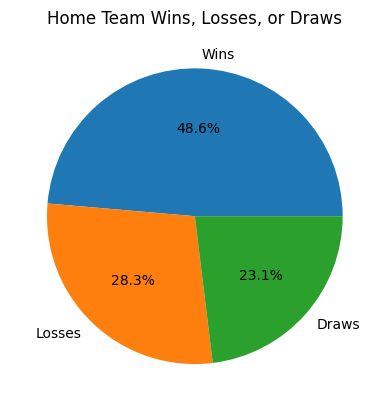

In [43]:
import matplotlib.pyplot as plt
labels_wld = 'Wins', 'Losses', 'Draws'
sizes_wld = [home_wins, home_losses, home_draws]
plt.title('Home Team Wins, Losses, or Draws')
plt.pie(sizes_wld, labels=labels_wld, autopct='%1.1f%%')

Step 6 (cont.):
Plot the neutral column as a pie chart.
Hint: try to Visualize the neutral column using Pandas (only one line of code).

<Axes: ylabel='neutral'>

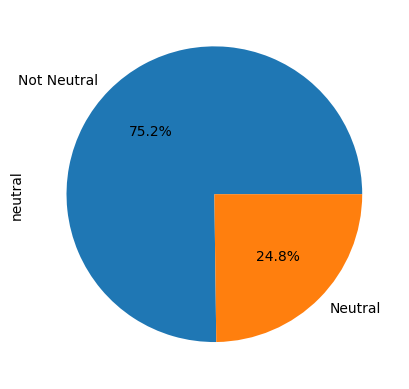

In [45]:
df['neutral'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Neutral', 'Neutral'])

Step 7:
# Unique Teams
How many unique teams are there in the dataset? Find out!

In [49]:
all_teams = pd.concat([df['home_team'], df['away_team']])
all_teams_count = len(all_teams.unique())
print(all_teams_count)

313
